In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1 SET DATASET

In [2]:
df=pd.read_csv('mnist_train.csv')
df.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y=np.array(df['label'])
data=df.values
X=data[:,1:]

In [4]:
print(X.shape,Y.shape)

(60000, 784) (60000,)


# Split

In [5]:
split=int(0.8*X.shape[0])
print(split)
X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


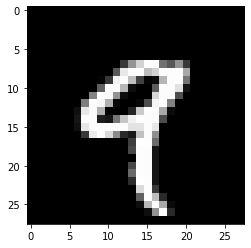

9


In [6]:
#Vislualization of ame sample
def drawImg(sample):
    sample=sample.reshape((28,28))
    plt.imshow(sample,cmap="gray")
    plt.show()

drawImg(X[4])
print(Y[4])

# KNN

In [7]:
def distance(x1,x2):
    return np.sqrt(sum( (x1-x2)**2) )
def knn(X,Y,point,k=5):
    val = []
    for i in range(X.shape[0]):
        val.append((distance(point,X[i]),Y[i]))
        
    
    val=sorted(val)
    val=val[:k]
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
    #print(new_val)
    index=new_val[1].argmax()
    return new_val[0][index]

# Make Prediction

In [8]:
prediction=knn(X_train,Y_train,X_test[1])
print(int(prediction))

7


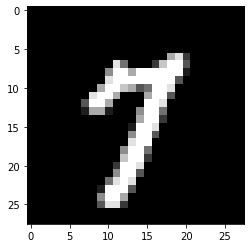

7


In [9]:
drawImg(X_test[1])
print(Y_test[1])